# Algoritmo de Grover
<p>Algoritmo cuántico de búsqueda que permite encontrar elementos en listas no estructuradas de manera más rápida que los algoritmos clásicos</p>
<img src="ejercicio.png" /> 

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

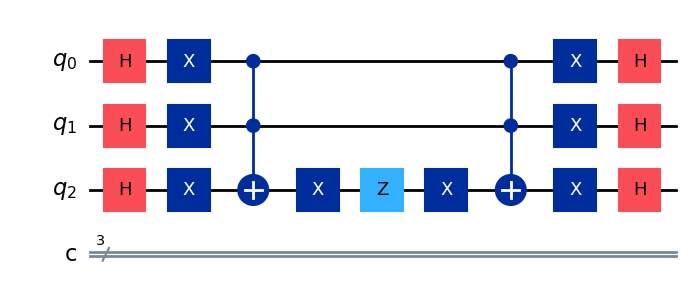

In [11]:
# Implementamos la puerta de Grover
Grover = QuantumCircuit(3,3)
Grover.h(range(3))
Grover.x(range(3))

Grover.ccx(0,1,2)

Grover.x(2)
Grover.z(2)
Grover.x(2)
Grover.ccx(0,1,2)

Grover.x(range(3))
Grover.h(range(3))

Grover.draw(output='mpl')


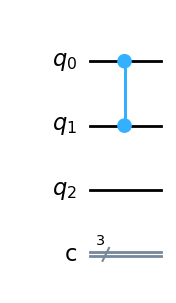

In [25]:
Detector = QuantumCircuit(3,3)
Detector.cz(1,0)
Detector.draw(output='mpl')

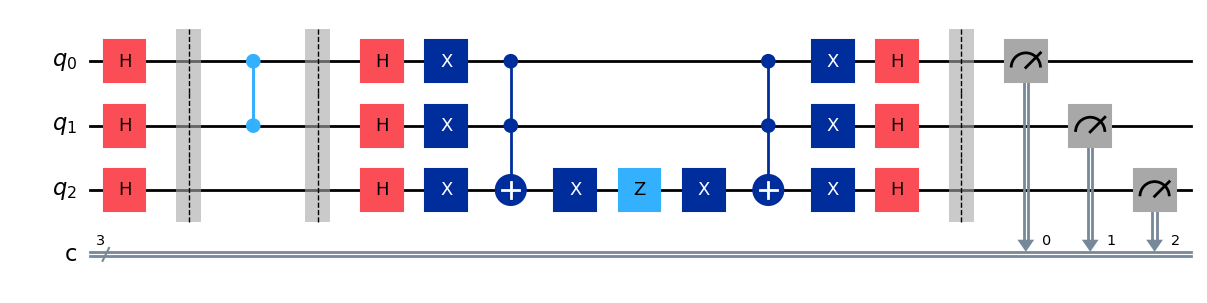

In [27]:
circ = QuantumCircuit(3,3)
circ.h(range(3))
circ.barrier(range(3))
circ = circ.compose(Detector)
circ.barrier(range(3))
circ = circ.compose(Grover)
circ.barrier(range(3))
circ.measure(range(3),range(3))
circ.draw(output='mpl')

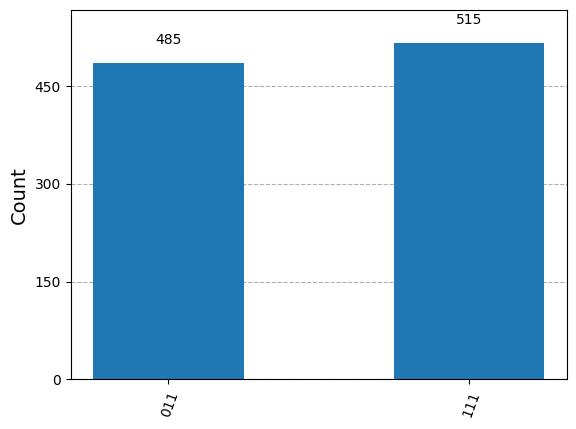

In [29]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circ ,shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)